In [2]:
!pip install -q inference supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 8.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 970.7/970.7 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.9/891.9 kB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.7/774.7 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from google.colab import userdata
from inference import get_model
ROBOFLOW_API_KEY = userdata.get('roboflow')
MODEL_ID = "sudden-infant-death-syndrome/3"
model = get_model(model_id=MODEL_ID, api_key=ROBOFLOW_API_KEY)

In [5]:
import cv2
image_path = "/content/download.jpg"
image = cv2.imread(image_path)

In [6]:
results = model.infer(image, confidence=.4)[0]
print(results)

visualization=None inference_id=None frame_id=None time=None image=InferenceResponseImage(width=212, height=238) predictions=[ObjectDetectionPrediction(x=106.0, y=130.0, width=212.0, height=200.0, confidence=0.8789116740226746, class_name='baby-lying-on-stomach', class_confidence=None, class_id=1, tracker_id=None, detection_id='2e7f8d73-17e8-4eea-8579-901901ffa0d9', parent_id=None)]


In [7]:
import supervision as sv
detections = sv.Detections.from_inference(results)
print(detections)

Detections(xyxy=array([[  0.,  30., 212., 230.]]), mask=None, confidence=array([0.87891167]), class_id=array([1]), tracker_id=None, data={'class_name': array(['baby-lying-on-stomach'], dtype='<U21')}, metadata={})


In [8]:
annotated_image = image.copy()
annotated_image = sv.BoxAnnotator().annotate(annotated_image,detections=detections)
annotated_image = sv.LabelAnnotator().annotate(annotated_image,detections=detections)
cv2.imwrite("annotated_image.jpg", annotated_image)

True

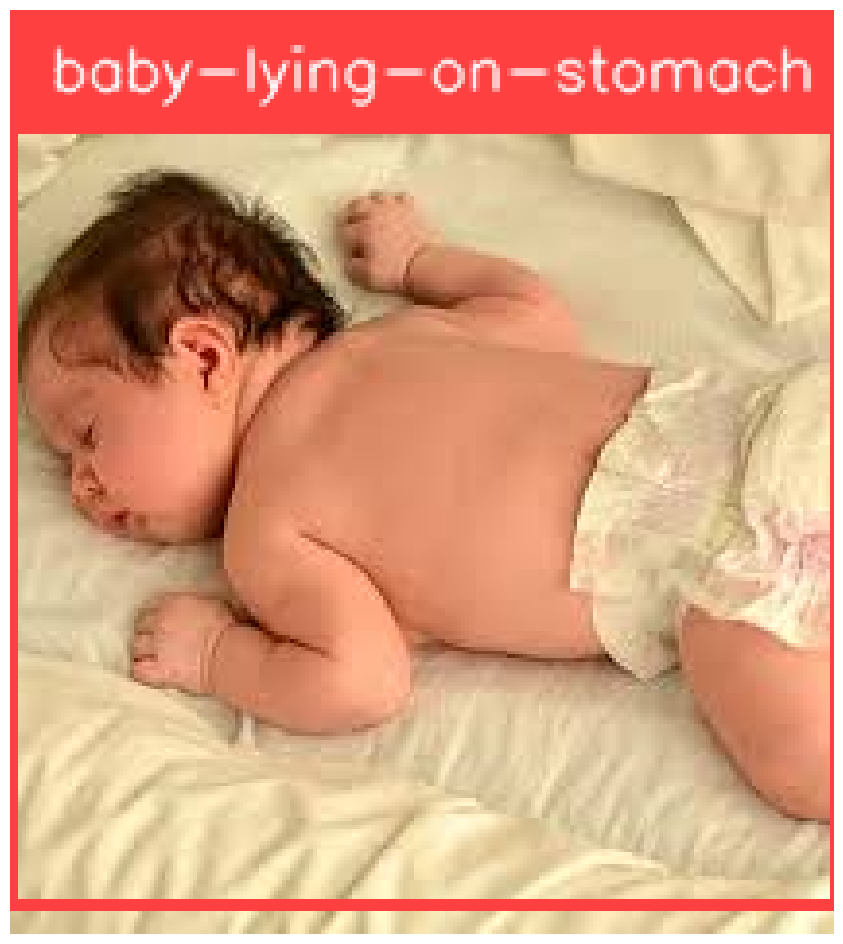

In [9]:
sv.plot_image(annotated_image)

In [10]:
image2_path = "/content/download (3).jpg"
image2 = cv2.imread(image2_path)

In [11]:
results = model.infer(image2, confidence=.4)[0]
print(results)

visualization=None inference_id=None frame_id=None time=None image=InferenceResponseImage(width=300, height=168) predictions=[ObjectDetectionPrediction(x=152.0, y=92.5, width=296.0, height=151.0, confidence=0.8575962781906128, class_name='baby-lying-on-back', class_confidence=None, class_id=0, tracker_id=None, detection_id='d67ca0da-6451-43ea-81f8-e07142c0c30d', parent_id=None)]


In [12]:
import supervision as sv
detections = sv.Detections.from_inference(results)
print(detections)

Detections(xyxy=array([[  4.,  17., 300., 168.]]), mask=None, confidence=array([0.85759628]), class_id=array([0]), tracker_id=None, data={'class_name': array(['baby-lying-on-back'], dtype='<U18')}, metadata={})


In [13]:
annotated_image = image2.copy()
annotated_image = sv.BoxAnnotator().annotate(annotated_image,detections=detections)
annotated_image = sv.LabelAnnotator().annotate(annotated_image,detections=detections)
cv2.imwrite("annotated_image.jpg", annotated_image)

True

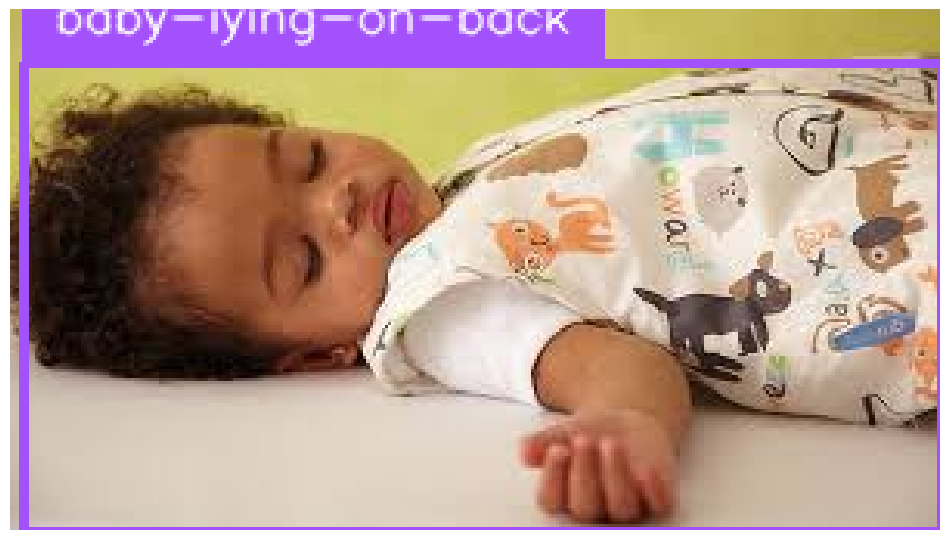

In [14]:
sv.plot_image(annotated_image)

In [ ]:
import cv2
import os
import supervision as sv

input_folder = "sample_test"
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.lower().endswith(('png', 'jpg', 'jpeg')):  
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)

        results = model.infer(image, confidence=0.4)[0]
        detections = sv.Detections.from_inference(results)

        annotated_image = image.copy()
        annotated_image = sv.BoxAnnotator().annotate(annotated_image, detections=detections)
        annotated_image = sv.LabelAnnotator().annotate(annotated_image, detections=detections)

        output_path = os.path.join(output_folder, f"annotated_{filename}")
        cv2.imwrite(output_path, annotated_image)
        print(f"Processed: {filename} -> {output_path}")

print("Processing complete. Check the output folder.")

Processed: img7.jpg -> output/annotated_img7.jpg
Processed: img5.jpg -> output/annotated_img5.jpg
Processed: img3.jpg -> output/annotated_img3.jpg
Processed: img1.jpg -> output/annotated_img1.jpg
Processed: img4.jpg -> output/annotated_img4.jpg
Processed: img6.jpg -> output/annotated_img6.jpg
Processed: img2.jpg -> output/annotated_img2.jpg
Processing complete. Check the output folder.
